In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [83]:
data1 = pd.read_csv("C:/Users/Hp/Desktop/task/advertising.csv")

In [84]:
display(data1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:>

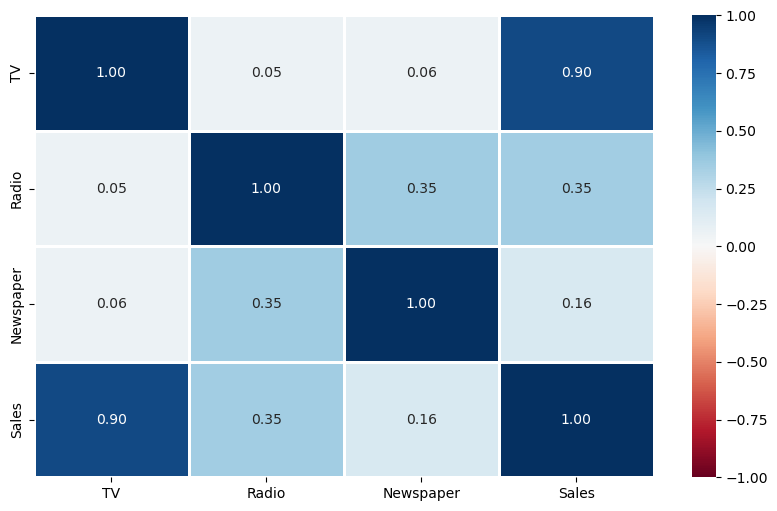

In [85]:
#Exploratory Data Analysis
#This its deep analysis to discover different pattern and sport anomalies
#We use a heatmap using seaborn library
plt.figure(figsize =(10, 6))
sns.heatmap(data1.corr(), cmap = 'RdBu', fmt = '.2f', linewidths = 2,vmin=-1, vmax=1, annot = True)

In [86]:
#Data description
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [87]:
#Spliting the dataset for simple linear regression
X = data1.iloc[:, : 1]
y = data1.iloc[:, 3]
#Spliting the dataset as train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.5,random_state = 50)
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [89]:
#Building a model for simple linear regression
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(X_train, y_train)

LinearRegression()

In [90]:
#Derived parameter
print("b = {}".format(ls.intercept_))
print("w = {}".format(ls.coef_))


b = 7.021550519686871
w = [0.05677358]


In [91]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("Training accuracy score: {}".format(ls.score(X_train, y_train)))
print("Testing accuracy score: {}".format(ls.score(X_test, y_test)))
y_pred = ls.predict(X_test)
mean_for_simple = mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
score_for_simple = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Training accuracy score: 0.799583867214793
Testing accuracy score: 0.8142045142024307
Mean squared error: 4.37
Coefficient of determination: 0.81


In [92]:
#Spliting the data for multiple linear regression
#Sliting the dataset
X = data1.iloc[:, :-1]
y = data1.iloc[:, 3]
#Spliting the dataset as train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25,random_state = 42)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [93]:
#By comparison between simple linear regression and multiple linear regression
#By comparison between simple linear regression and multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
ls = LinearRegression()
ls.fit(X_train,y_train)
y_pred_s = ls.predict(X_test)
y_pred_m = ls.predict(X_test)
mean_for_simple = mean_squared_error(y_test, y_pred_s)
print("Mean squared error for simple linear regression is: {}".format(mean_for_simple))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination for simple linear regression is: {}".format(score_for_simple,score_for_multiple))

Mean squared error for simple linear regression is: 2.4040674447118855
